## Exploratory Data Analysis

In [177]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the data

In [113]:
data = pd.read_csv('../datasets/train.csv')
data.shape

(5044, 39)

In [114]:
pd.set_option('display.max_columns', None)
data.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,target,id
0,F,50.0,20/05/98,29.200000,2.0,Play 100,BS210,62.0,153.000000,185.0,438.600001,4.0,29.0,126.002615,2.045727,2.467742,2.370811,7.25,251.0,620.600001,2.472510,746.602616,0.003984,Med,20.600001,9.930712,2.045727,52.446773,112.386773,OK,0.150531,0.246536,0.706735,0.046729,0.203034,F,F,0,K262360
1,M,25.0,16/12/96,46.533333,1.0,CAT 100,ASAD90,146.0,718.800000,98.0,164.700000,4.0,37.2,251.580636,41.072379,4.923288,1.680612,9.30,248.0,920.700000,3.712500,1172.280636,0.002016,Med,320.700000,12.807103,41.072380,116.546571,221.546571,OK,0.188988,0.780710,0.178886,0.040404,0.273249,F,F,1,K170160
2,F,46.0,27/08/97,38.066667,1.0,CAT 50,WC95,160.0,322.800000,7.0,123.900000,0.0,0.0,91.584877,21.575073,2.017500,17.700000,0.00,167.0,446.700000,2.674850,538.284877,0.002994,MedLow,146.700000,12.226326,17.936021,45.411484,128.811484,OK,0.239300,0.722633,0.277367,0.000000,0.205025,F,F,0,K331610
3,F,59.0,13/07/98,27.400000,1.0,CAT 50,BS110,84.0,317.400001,57.0,161.699999,0.0,0.0,23.998036,20.950771,3.778571,2.836842,0.00,141.0,479.100000,3.397872,503.098036,0.003546,MedLow,179.100000,11.624922,20.820235,28.019646,111.419646,OK,0.221467,0.662492,0.337508,0.000000,0.050090,F,F,0,K332460
4,F,25.0,08/01/99,21.433333,1.0,Play 300,WC95,14.0,309.600000,326.0,637.800000,6.0,14.4,87.051515,0.000000,22.114286,1.956442,2.40,346.0,961.800000,2.779769,1048.851515,0.001445,Med,-838.200000,9.403618,0.000000,34.820606,112.760606,OK,0.107509,0.321896,0.663132,0.014972,0.090509,F,F,0,K394220


In [115]:
data.duplicated().sum()

0

Remove id because it's irrelevant.

In [116]:
data = data.drop('id', axis=1)

Connect_Date - convert it into a relative variable (days since first connect date) instead of keeping it as a date

**should this be put in a pipeline: convert this column to days since first connect_date -- since it's something you do over multiple instances**

In [117]:
data['Connect_Date'] = pd.to_datetime(data['Connect_Date'], format='%d/%m/%y')
earliest_date = data['Connect_Date'].min()
data['Connect_Date'] = (data['Connect_Date'] - earliest_date).dt.days

Missing values?

In [118]:
missing_count = data.isnull().sum() 
missing_data = pd.DataFrame({'Column Name': missing_count.index, 'Missing Count': missing_count.values})
missing_data = missing_data.sort_values(by='Missing Count', ascending=False)
missing_data = missing_data[missing_data['Missing Count'] > 0]
missing_data

,Column Name,Missing Count
22,Dropped_calls_ratio,4
23,Usage_Band,4
25,call_cost_per_min,4


Are these the same 4 rows for each variable? Yes

In [119]:
rows_with_missing_values = data[data.isnull().any(axis=1)]
rows_with_missing_values

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,target
1736,F,48.0,937,26.966667,2.0,Play 100,BS110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,-600.0,NaN,0.0,0.0,59.94,OK,0.5,0.0,0.0,0.0,0.0,F,T,0
3237,F,34.0,446,43.333333,2.0,Play 100,BS110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,-600.0,NaN,0.0,0.0,59.94,OK,0.5,0.0,0.0,0.0,0.0,F,T,0
3836,M,21.0,2,58.133333,2.0,Play 100,CAS30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,-600.0,NaN,0.0,0.0,59.94,OK,0.5,0.0,0.0,0.0,0.0,F,T,1
4301,F,22.0,950,26.533333,5.0,Play 100,CAS30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,-600.0,NaN,0.0,0.0,59.94,OK,0.5,0.0,0.0,0.0,0.0,F,T,1


In [120]:
# Create an empty list to store column types
column_types = []

# Iterate through each column
for column, dtype in data.dtypes.items():
    # Categorize columns
    if dtype == 'object':
        column_type = 'categorical'
    elif dtype in ['int64', 'float64']:
        column_type = 'numeric'
    else:
        column_type = 'other'

    # Append to the list
    column_types.append({'Column': column, 'Type': column_type})

# Create a DataFrame from the list
column_types_df = pd.DataFrame(column_types)

# Display the resulting DataFrame
column_types_df

,Column,Type
0,Gender,categorical
1,Age,numeric
2,Connect_Date,numeric
3,L_O_S,numeric
4,Dropped_Calls,numeric
5,tariff,categorical
6,Handset,categorical
7,Peak_calls_Sum,numeric
8,Peak_mins_Sum,numeric
9,OffPeak_calls_Sum,numeric


In [121]:
categorical_columns = column_types_df.loc[column_types_df['Type'] == 'categorical', 'Column'].tolist()
descriptive_cat = {}

for col in categorical_columns:
    unique_values = data[col].nunique()
    mode_value = data[col].mode().values[0]
    mode_frequency = data[col].value_counts().max()
    total_count = data[col].count()
    missing_cases = data[col].isna().sum()

    descriptive_cat[col] = {
        'Unique Values': unique_values,
        'Mode': mode_value,
        'Mode Frequency': mode_frequency,
        'Mode Frequency Percentage': round((mode_frequency / total_count) * 100, 1),
        'Missing Cases': missing_cases
    }

cat_data = pd.DataFrame(descriptive_cat).T
cat_data

,Unique Values,Mode,Mode Frequency,Mode Frequency Percentage,Missing Cases
Gender,2,F,2597,51.5,0
tariff,5,CAT 200,2246,44.5,0
Handset,11,S50,1175,23.3,0
Usage_Band,5,Med,2779,55.1,4
Tariff_OK,4,OK,5001,99.1,0
high Dropped calls,2,F,4915,97.4,0
No Usage,2,F,5040,99.9,0


In [122]:
numeric_columns = column_types_df.loc[column_types_df['Type'] == 'numeric', 'Column'].tolist()
descriptive_num = {}

for col in numeric_columns:
    descriptive_num[col] = {
        'Mean': round(data[col].mean(), 2),
        'Median': round(data[col].median(), 2),
        'Standard Deviation': round(data[col].std(), 2),
        'Missing Cases': int(data[col].isna().sum())  # Convert missing cases to integer (0 decimals)
    }

num_data = pd.DataFrame(descriptive_num).T
num_data

,Mean,Median,Standard Deviation,Missing Cases
Age,31.38,29.00,12.77,0.0
Connect_Date,737.19,738.50,421.26,0.0
L_O_S,33.63,33.58,14.04,0.0
Dropped_Calls,2.68,1.00,3.43,0.0
Peak_calls_Sum,239.15,161.00,239.63,0.0
Peak_mins_Sum,708.61,611.70,503.96,0.0
OffPeak_calls_Sum,104.08,73.00,97.87,0.0
OffPeak_mins_Sum,312.42,293.70,199.09,0.0
Weekend_calls_Sum,16.49,12.00,16.38,0.0
Weekend_mins_Sum,50.14,44.40,36.05,0.0


only 15% are churners (target = 1) so we are dealing with an imbalanced dataset 

### Categorical columns

In [123]:
def get_counts(dataframe, column_name):
    """Get value counts for the specified column and return as a DataFrame with percentage."""
    if column_name not in dataframe.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    column_counts = data[column_name].value_counts().reset_index()
    column_counts.columns = [column_name, 'Count']
    column_counts['Percentage'] = round((column_counts['Count'] / len(dataframe[column_name])) * 100, 2)
    return column_counts

In [181]:
def plot_categorical_vs_target(dataframe, categorical_column, target_column='target'):
    if categorical_column not in dataframe.columns:
        print(f"Error: Column '{categorical_column}' not found in the DataFrame.")
        return

    if target_column not in dataframe.columns:
        print(f"Error: Column '{target_column}' not found in the DataFrame.")
        return

    # Set up the figure
    plt.figure(figsize=(10, 4))

    # Create a grouped bar plot
    sns.countplot(x=categorical_column, hue=target_column, data=dataframe)
    plt.title(f'Relationship between {categorical_column} and {target_column}')
    plt.xlabel(categorical_column)
    plt.ylabel('Count')
    plt.legend(title=target_column)

    plt.show()

Gender

In [182]:
get_counts(data, 'Gender')

,Gender,Count,Percentage
0,F,2597,51.49
1,M,2447,48.51


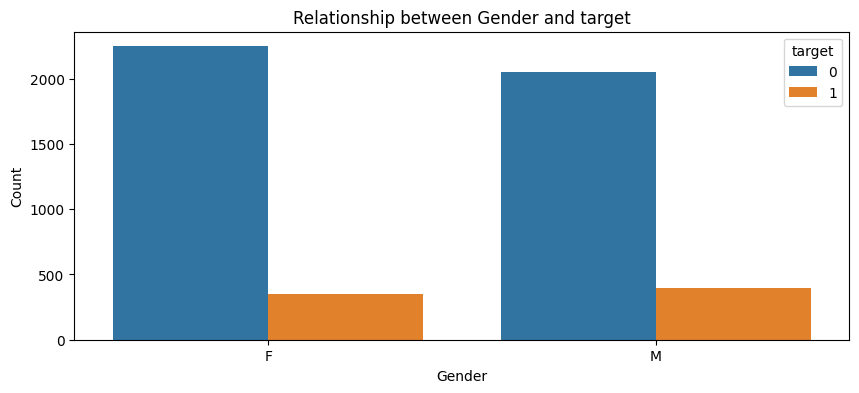

In [183]:
plot_categorical_vs_target(data, 'Gender')

tariff

In [184]:
get_counts(data, 'tariff')

,tariff,Count,Percentage
0,CAT 200,2246,44.53
1,CAT 100,1047,20.76
2,Play 100,788,15.62
3,Play 300,648,12.85
4,CAT 50,315,6.25


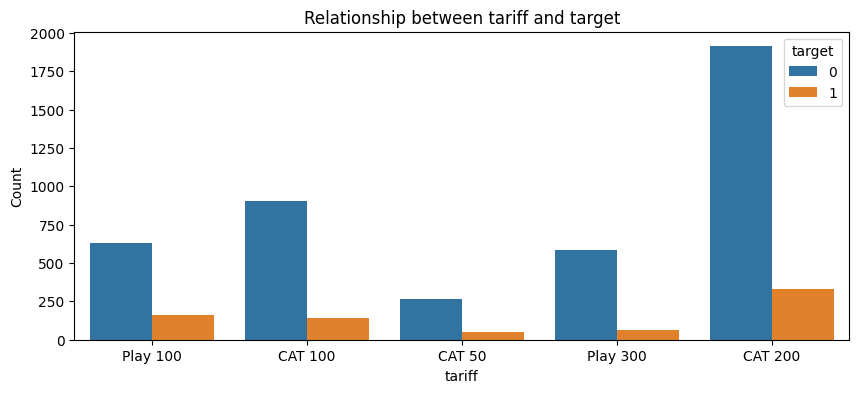

In [185]:
plot_categorical_vs_target(data, 'tariff')

Handset

In [186]:
get_counts(data, 'Handset')

,Handset,Count,Percentage
0,S50,1175,23.30
1,BS110,854,16.93
2,S80,741,14.69
3,WC95,686,13.60
4,ASAD170,665,13.18
5,BS210,283,5.61
6,ASAD90,270,5.35
7,CAS30,180,3.57
8,CAS60,106,2.10
9,SOP20,48,0.95


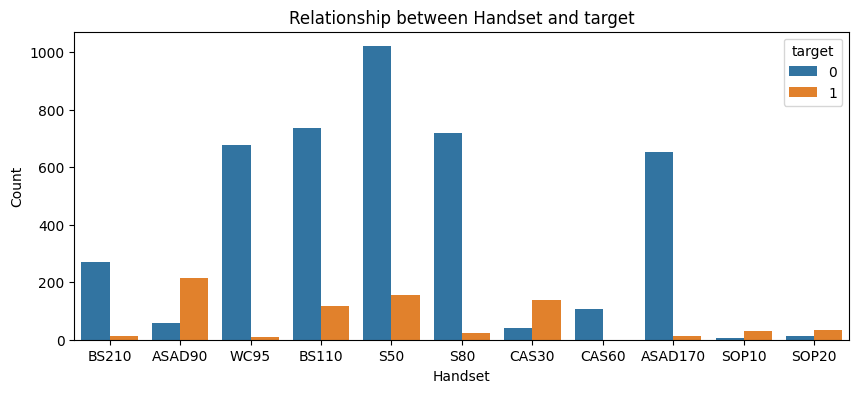

In [187]:
plot_categorical_vs_target(data, 'Handset')

Usage_Band

In [188]:
get_counts(data, 'Usage_Band')

,Usage_Band,Count,Percentage
0,Med,2779,55.10
1,MedHigh,1270,25.18
2,MedLow,547,10.84
3,High,360,7.14
4,Low,84,1.67


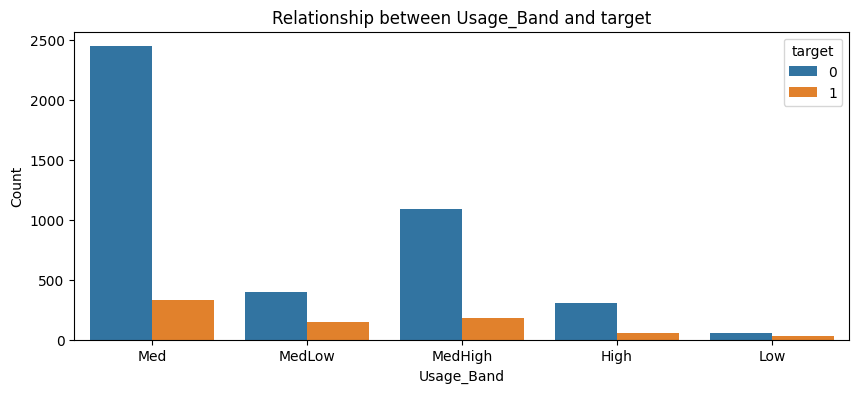

In [189]:
plot_categorical_vs_target(data, 'Usage_Band')

Tariff_OK

In [128]:
get_counts(data, 'Tariff_OK')

,Tariff_OK,Count,Percentage
0,OK,5001,99.15
1,High CAT 100,28,0.56
2,High CAT 50,9,0.18
3,High Play 100,6,0.12


high Dropped calls

In [129]:
get_counts(data, 'high Dropped calls')

,high Dropped calls,Count,Percentage
0,F,4915,97.44
1,T,129,2.56


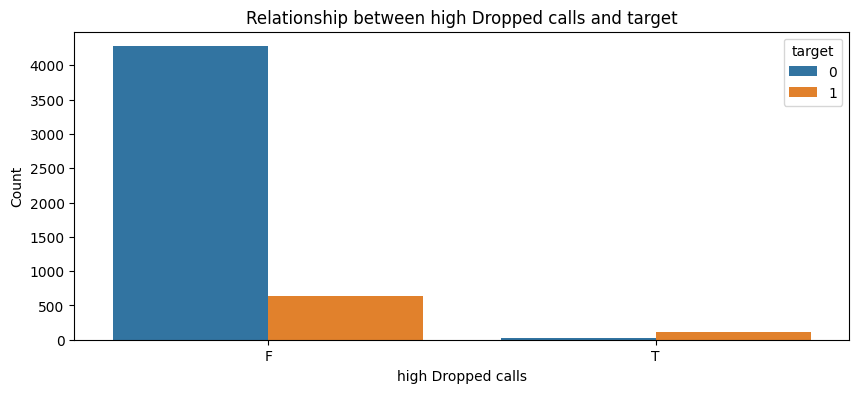

In [191]:
plot_categorical_vs_target(data, 'high Dropped calls')

No Usage

In [130]:
get_counts(data, 'No Usage')

,No Usage,Count,Percentage
0,F,5040,99.92
1,T,4,0.08


##### Ideas for pre-processing for categorical variables:
- gender: one-hot encoding (binary indicator 1/0)
- tariff: weights of evidence or one-hot encoding (ordinality or not?)
- handset: WOE
- Usage_Band: ordinal so take this into account
- tariff_OK, high dropped calls and No Usage might be very uninformative because extremely imbalanced

### Target

In [131]:
get_counts(data, 'target')

,target,Count,Percentage
0,0,4299,85.23
1,1,745,14.77


Make sure to use models that can handle a binary target and note that there is imbalance (not as bad as cases like fraud but still should be taken into account - maybe evaluating using the other evaluation metric than AUC already does this but idk if that is enough)

### Numeric columns

In [132]:
'''
def plot_histogram_and_boxplot(dataframe, column_name):
    if column_name not in dataframe.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    # Set up the figure with two subplots
    fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.85, 0.15)}, figsize=(10, 4))

    # Plot histogram with density line
    sns.histplot(data=dataframe, x=column_name, kde=True, ax=ax_hist)
    ax_hist.set_title(f'Histogram with Density Line for {column_name}')

    # Plot boxplot
    sns.boxplot(data=dataframe, x=column_name, ax=ax_box)
    ax_box.set_xlabel(column_name)
    ax_box.set_title(f'Boxplot for {column_name}')

    plt.show()
'''

'\ndef plot_histogram_and_boxplot(dataframe, column_name):\n    if column_name not in dataframe.columns:\n        print(f"Error: Column \'{column_name}\' not found in the DataFrame.")\n        return\n\n    # Set up the figure with two subplots\n    fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.85, 0.15)}, figsize=(10, 4))\n\n    # Plot histogram with density line\n    sns.histplot(data=dataframe, x=column_name, kde=True, ax=ax_hist)\n    ax_hist.set_title(f\'Histogram with Density Line for {column_name}\')\n\n    # Plot boxplot\n    sns.boxplot(data=dataframe, x=column_name, ax=ax_box)\n    ax_box.set_xlabel(column_name)\n    ax_box.set_title(f\'Boxplot for {column_name}\')\n\n    plt.show()\n'

In [133]:
# put both functions together 
def plot_histogram_and_boxplot(dataframe, column_name, target_column='target'):
    if column_name not in dataframe.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    # Set up the figure with subplots
    fig, axes = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (0.6, 0.15, 0.25)}, figsize=(10, 8))

    # Plot histogram with density line
    sns.histplot(data=dataframe, x=column_name, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram with Density Line for {column_name}')

    # Plot boxplot for the entire column
    sns.boxplot(data=dataframe, x=column_name, ax=axes[1])
    axes[1].set_xlabel(column_name)
    axes[1].set_title(f'Boxplot for {column_name}')

    # Plot separate boxplots for each binary value of the target column
    if target_column and target_column in dataframe.columns:
        sns.boxplot(x=column_name, y=target_column, data=dataframe, orient='h', ax=axes[2])
        axes[2].set_title(f'Boxplot for {column_name} by {target_column}')

    plt.show()

In [134]:
'''
def visualize_continuous_vs_target(data, target_column, continuous_column):
    # Set up the subplot
    plt.figure(figsize=(10, 4))

    # Create a box plot
    sns.boxplot(x=continuous_column, y=target_column, data=data, orient='h')
    plt.title(f'Box Plot for {continuous_column} by {target_column}')
    plt.show()
'''

"\ndef visualize_continuous_vs_target(data, target_column, continuous_column):\n    # Set up the subplot\n    plt.figure(figsize=(10, 4))\n\n    # Create a box plot\n    sns.boxplot(x=continuous_column, y=target_column, data=data, orient='h')\n    plt.title(f'Box Plot for {continuous_column} by {target_column}')\n    plt.show()\n"

Age

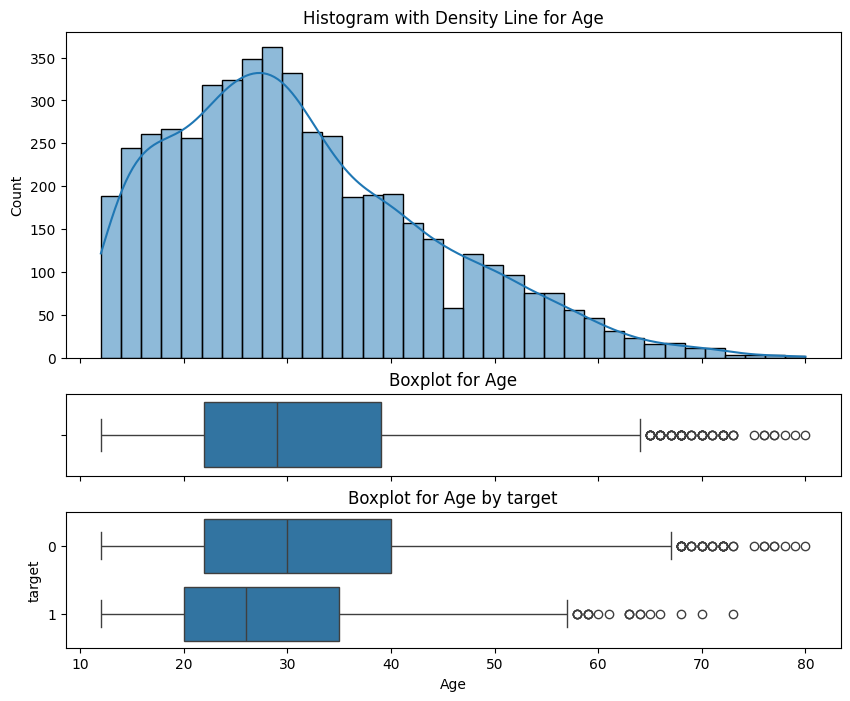

In [135]:
plot_histogram_and_boxplot(data, 'Age')

Connect_Date

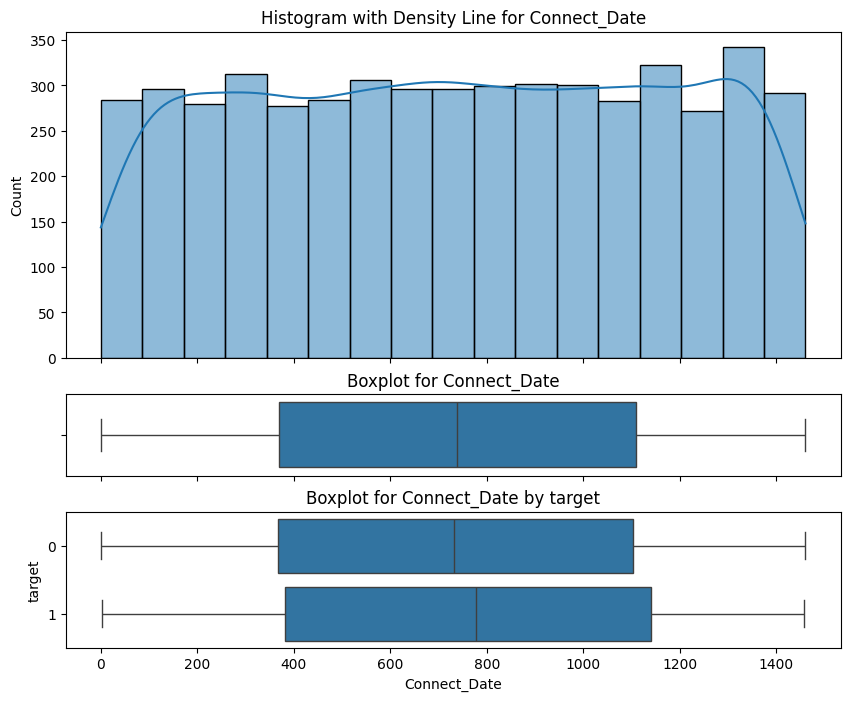

In [136]:
plot_histogram_and_boxplot(data, 'Connect_Date')

L_O_S

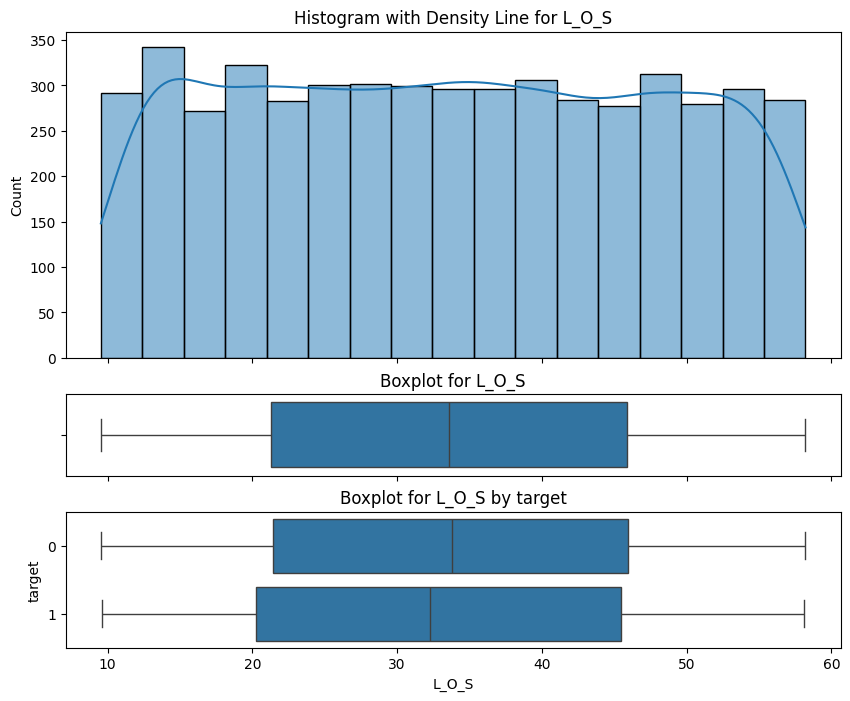

In [137]:
plot_histogram_and_boxplot(data, 'L_O_S')

Dropped_Calls

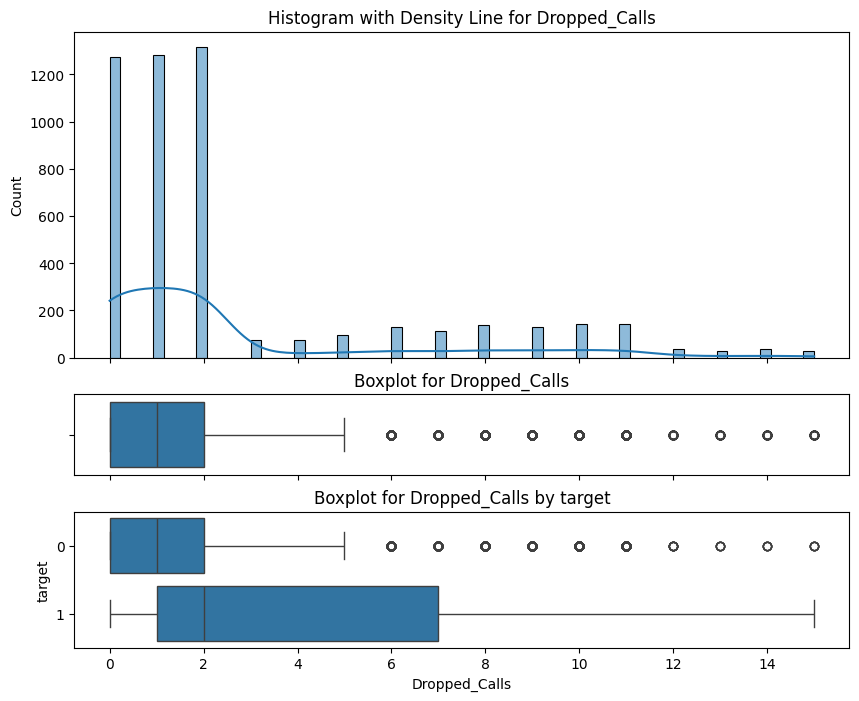

In [138]:
plot_histogram_and_boxplot(data, 'Dropped_Calls')

Peak_calls_Sum

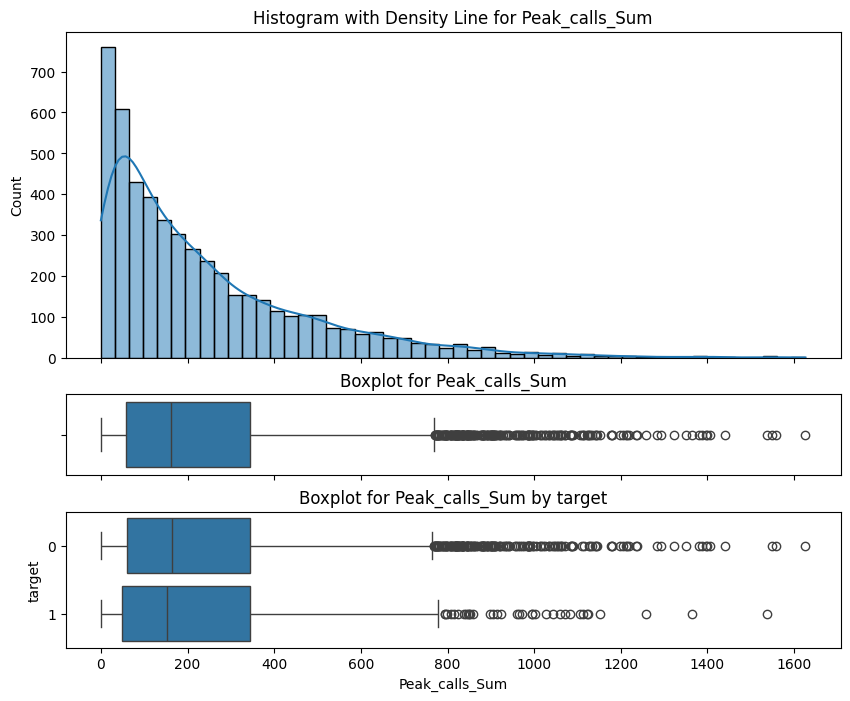

In [139]:
plot_histogram_and_boxplot(data, 'Peak_calls_Sum')

Peak_mins_Sum

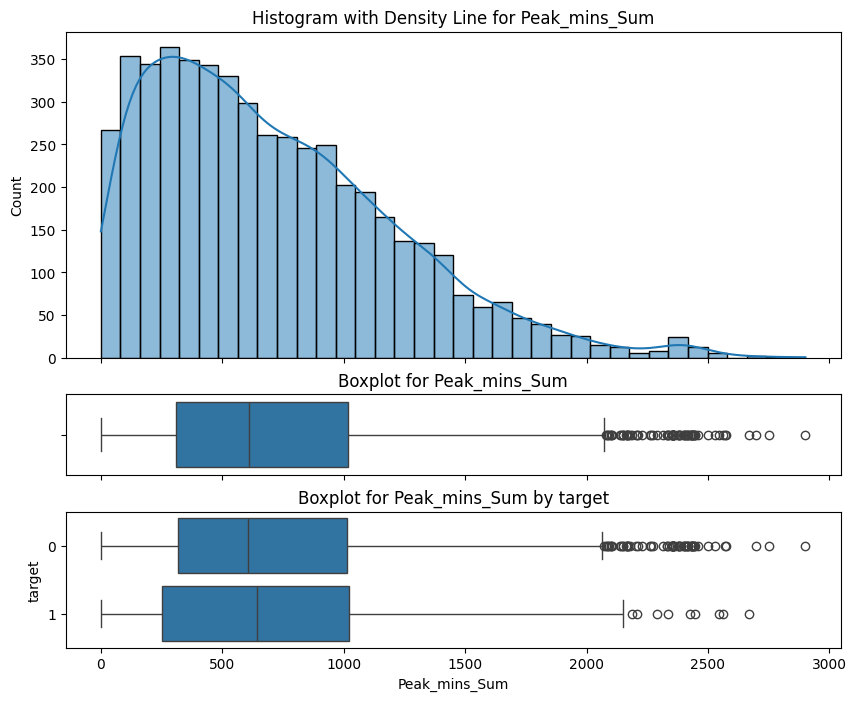

In [140]:
plot_histogram_and_boxplot(data, 'Peak_mins_Sum')

OffPeak_calls_Sum

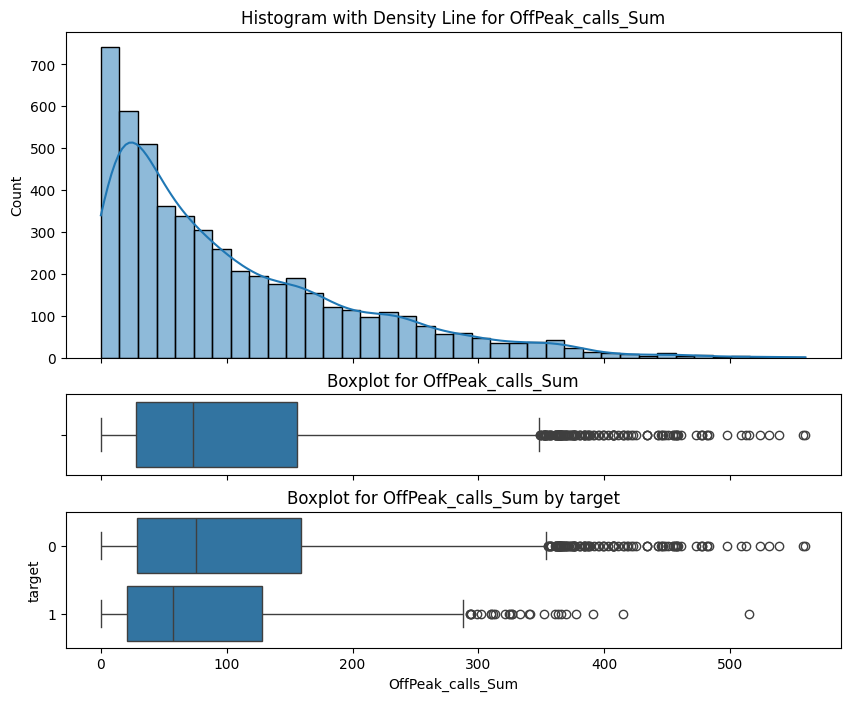

In [141]:
plot_histogram_and_boxplot(data, 'OffPeak_calls_Sum')

OffPeak_mins_Sum

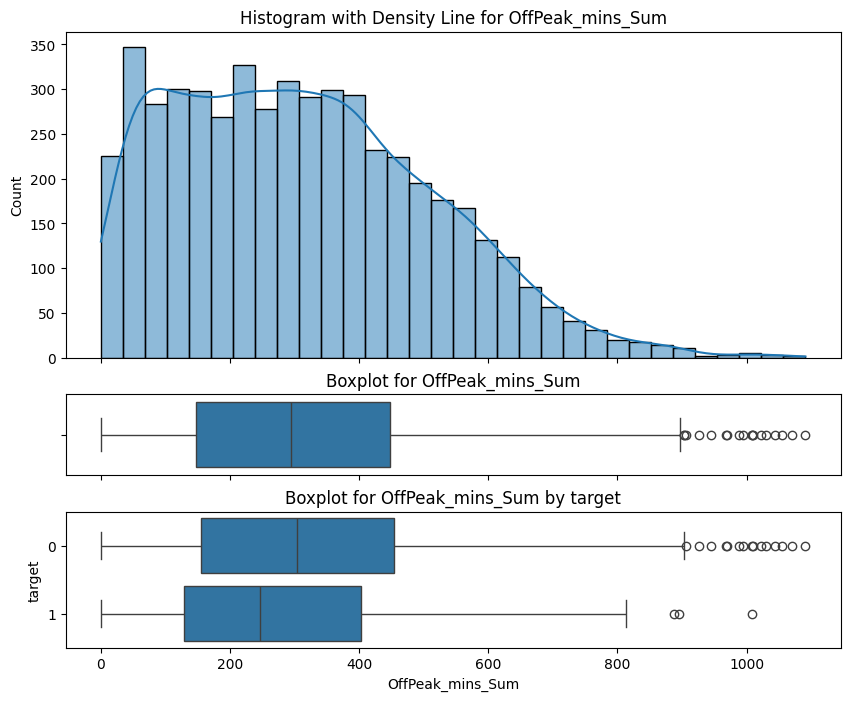

In [142]:
plot_histogram_and_boxplot(data, 'OffPeak_mins_Sum')

Weekend_calls_Sum

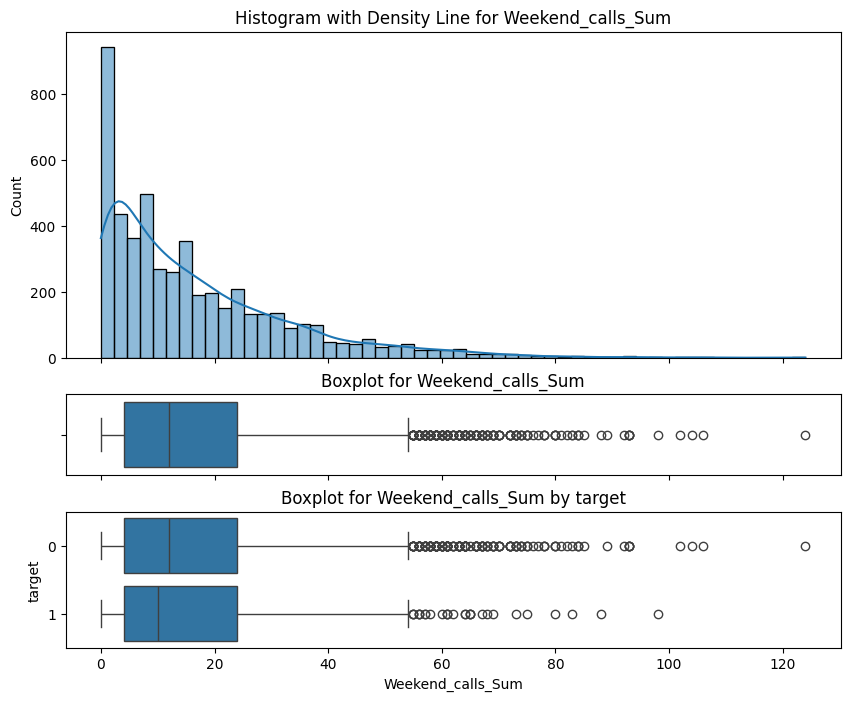

In [143]:
plot_histogram_and_boxplot(data, 'Weekend_calls_Sum')

Weekend_mins_Sum

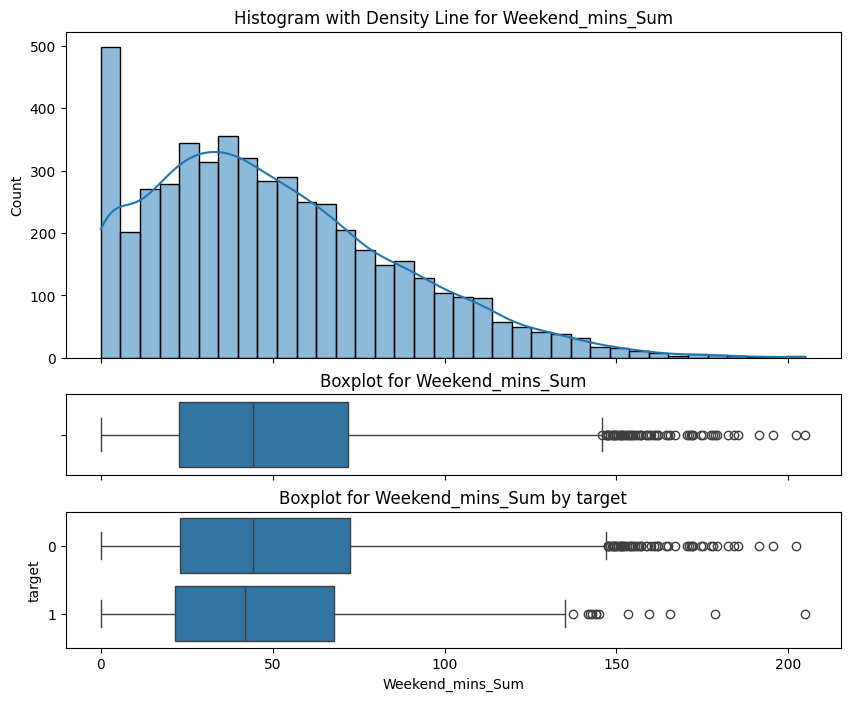

In [144]:
plot_histogram_and_boxplot(data, 'Weekend_mins_Sum')

International_mins_Sum

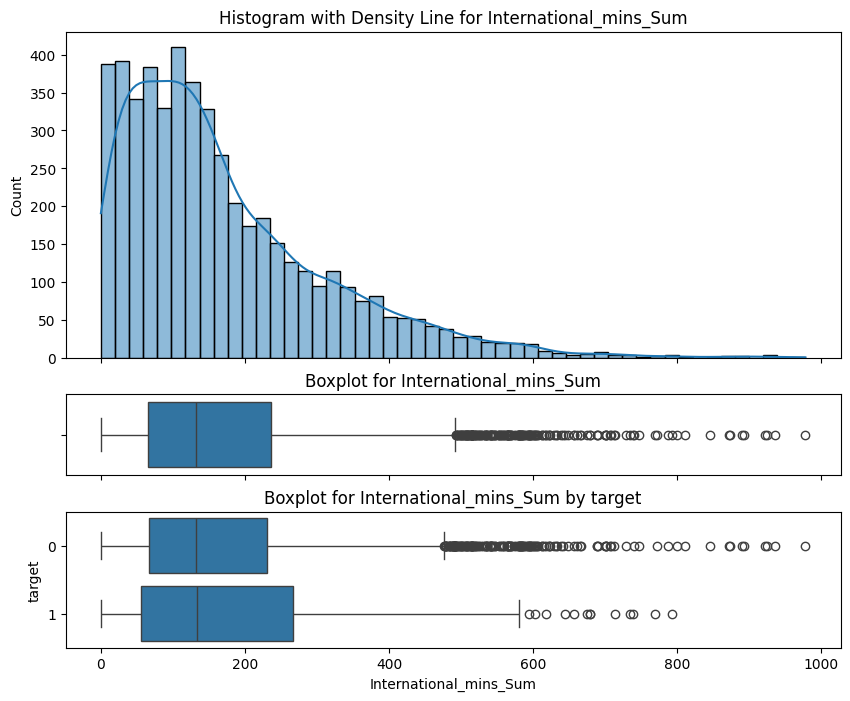

In [145]:
plot_histogram_and_boxplot(data, 'International_mins_Sum')

Nat_call_cost_Sum

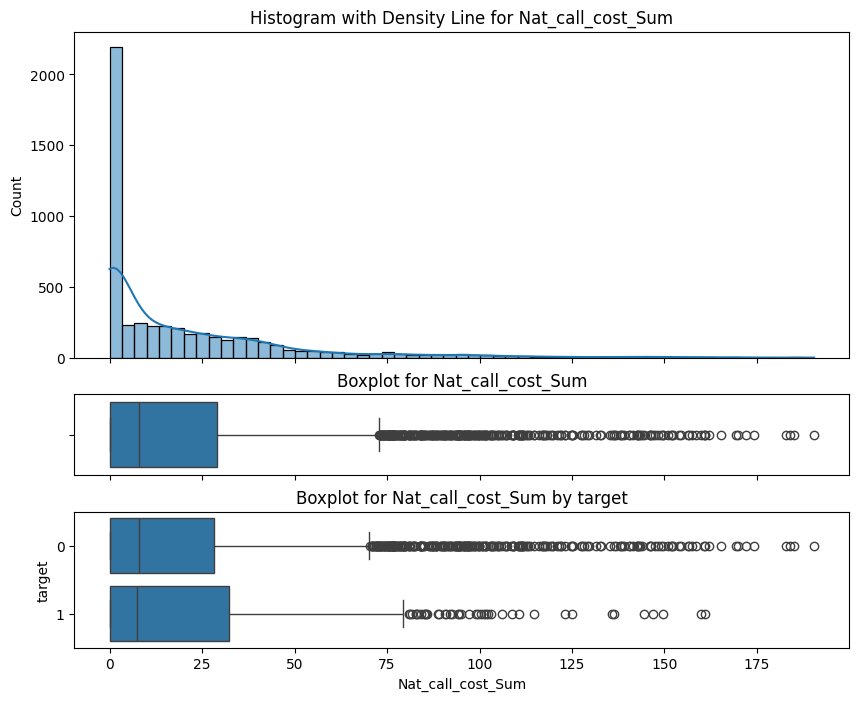

In [146]:
plot_histogram_and_boxplot(data, 'Nat_call_cost_Sum')

AvePeak

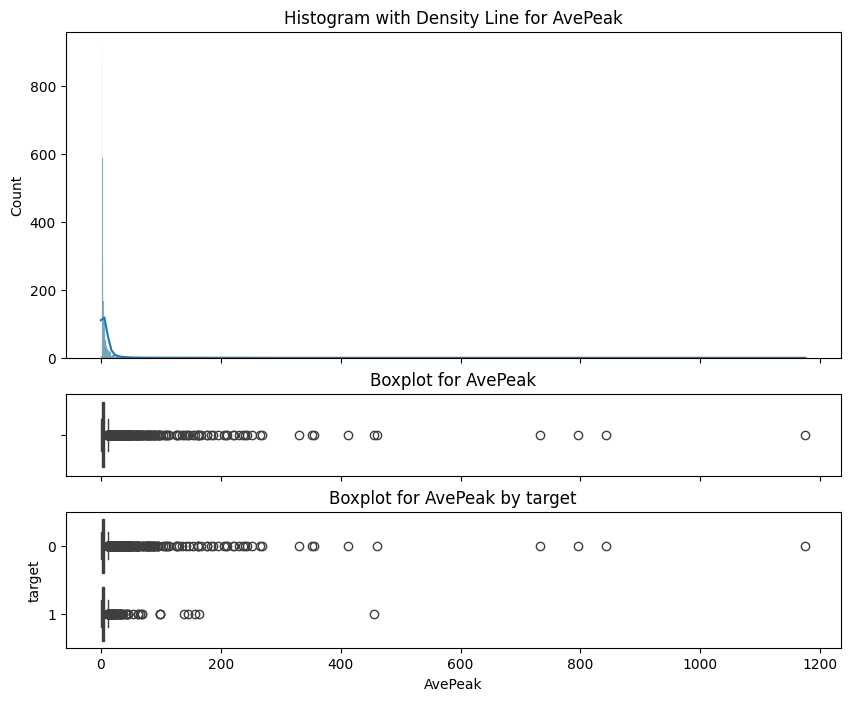

In [147]:
plot_histogram_and_boxplot(data, 'AvePeak')

*Truncate the last value? the last 4 values?*

AveOffPeak

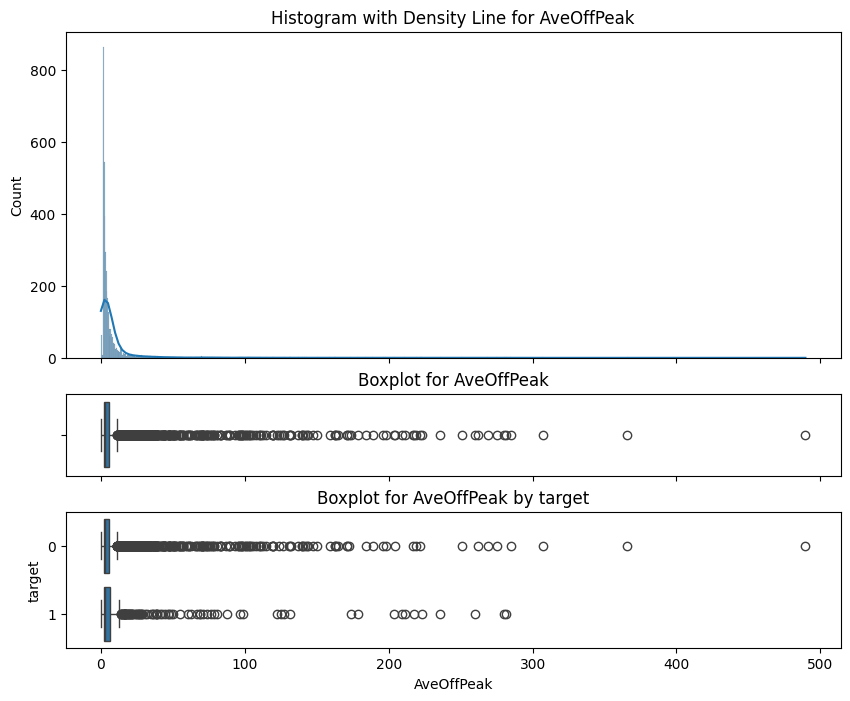

In [148]:
plot_histogram_and_boxplot(data, 'AveOffPeak')

AveWeekend

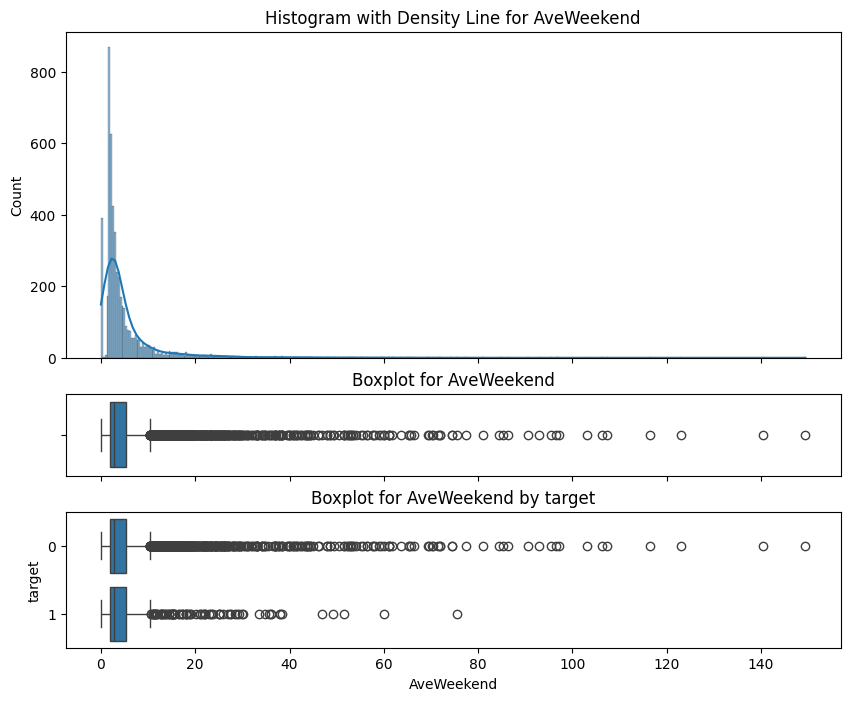

In [149]:
plot_histogram_and_boxplot(data, 'AveWeekend')

National_calls

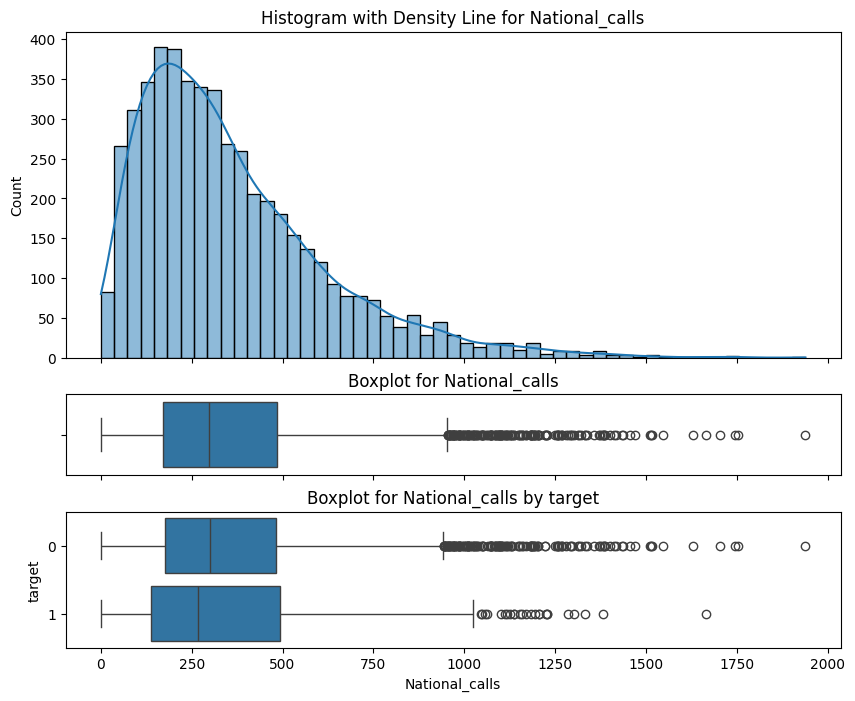

In [150]:
plot_histogram_and_boxplot(data, 'National_calls')

National mins

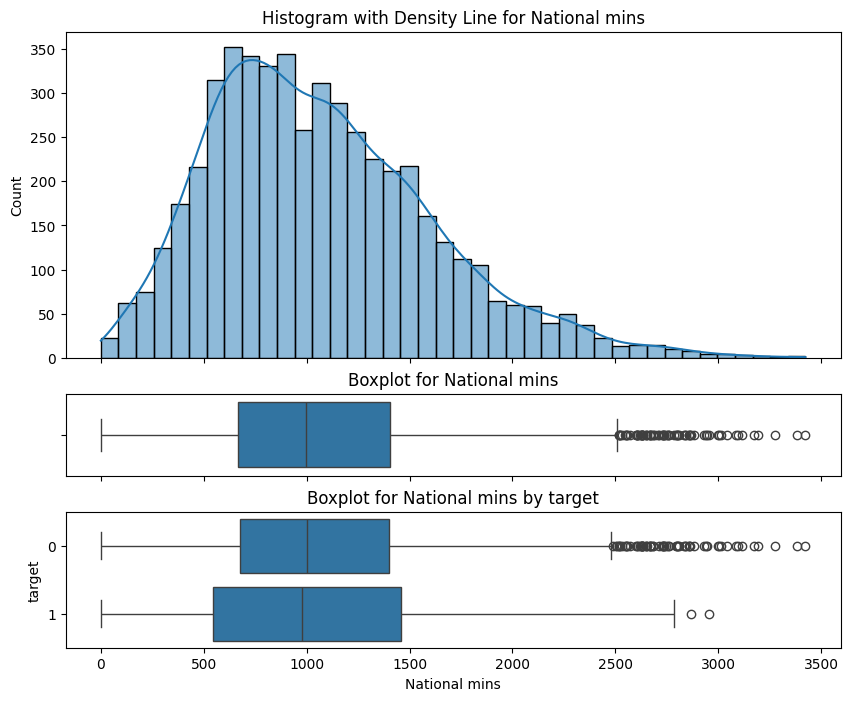

In [151]:
plot_histogram_and_boxplot(data, 'National mins')

AveNational

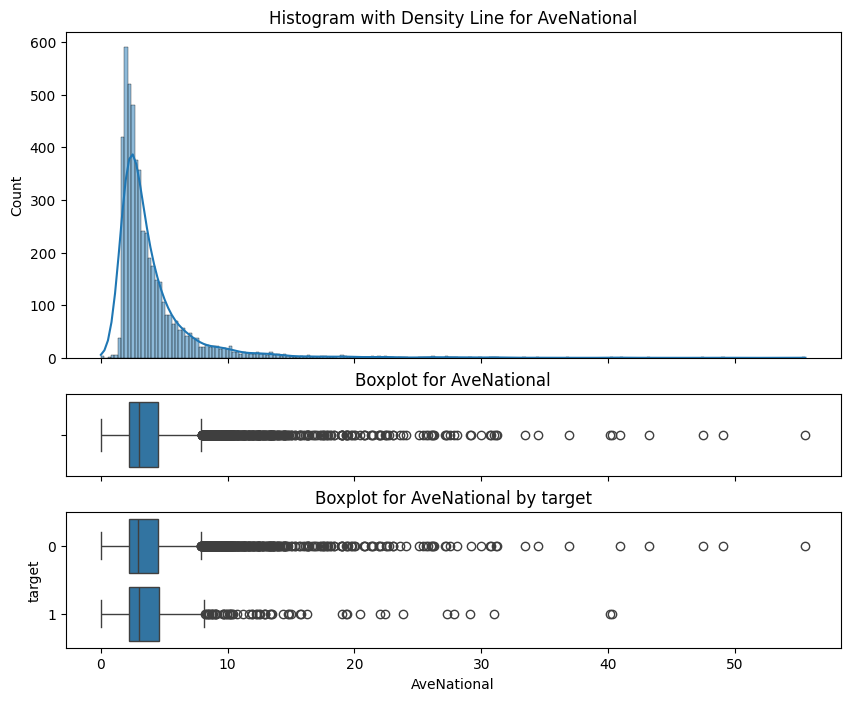

In [152]:
plot_histogram_and_boxplot(data, 'AveNational')

All_calls_mins

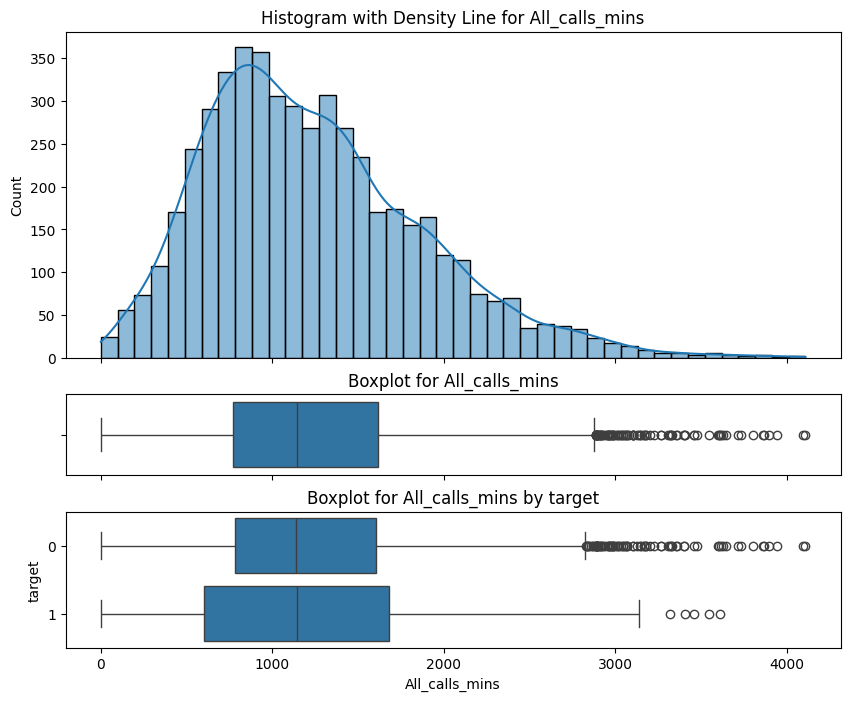

In [153]:
plot_histogram_and_boxplot(data, 'All_calls_mins')

Dropped_calls_ratio

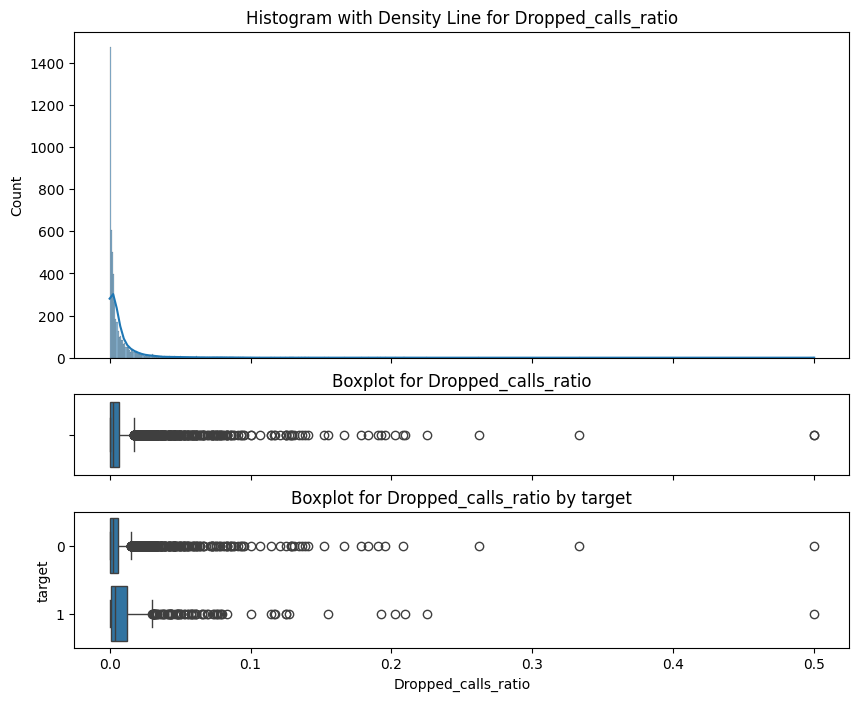

In [154]:
plot_histogram_and_boxplot(data, 'Dropped_calls_ratio')

truncate maybe the last or last 2 values?

call_cost_per_min

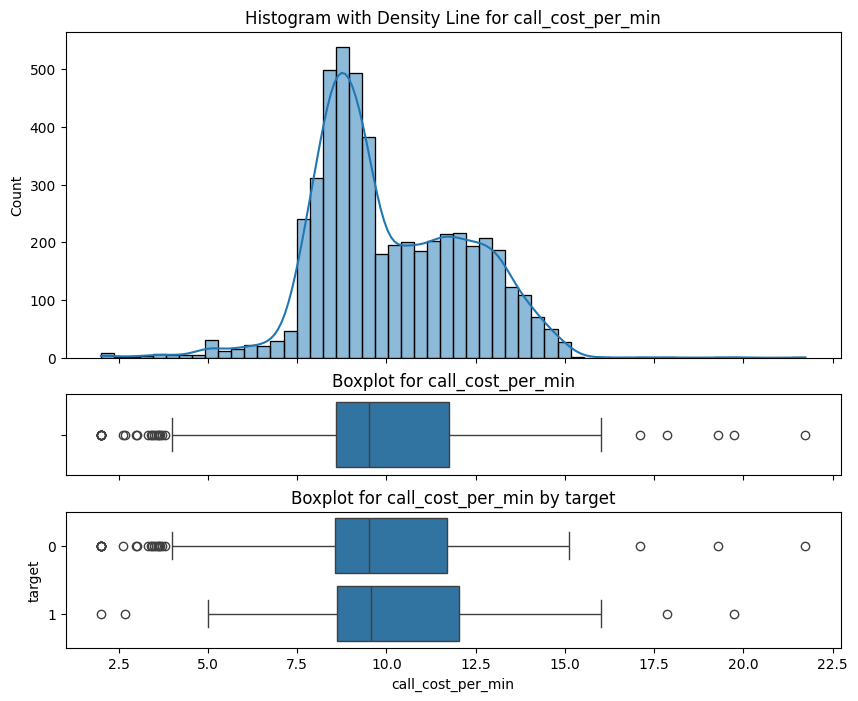

In [155]:
plot_histogram_and_boxplot(data, 'call_cost_per_min')

actual call cost

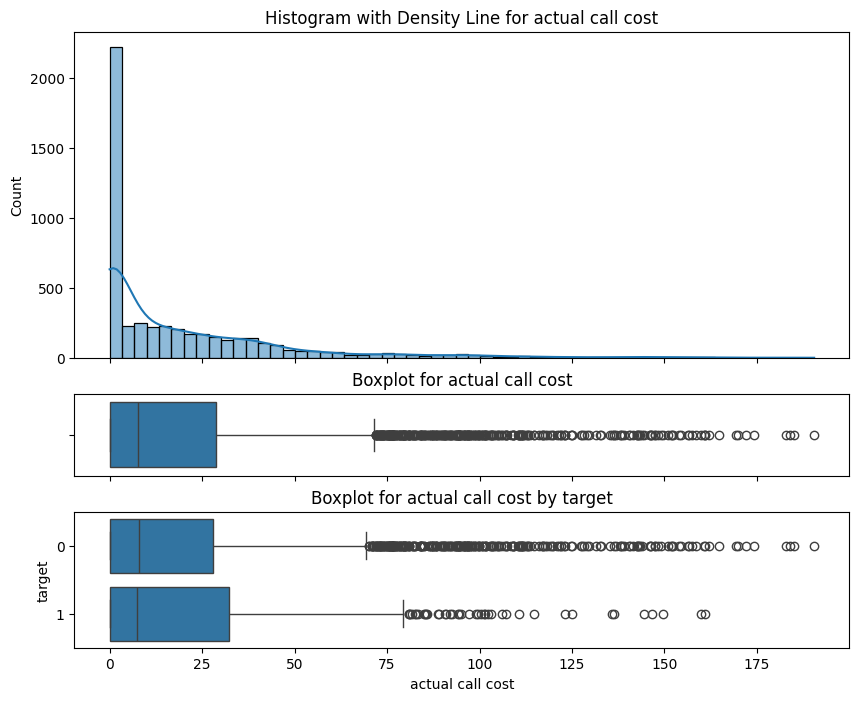

In [156]:
plot_histogram_and_boxplot(data, 'actual call cost')

Total_call_cost

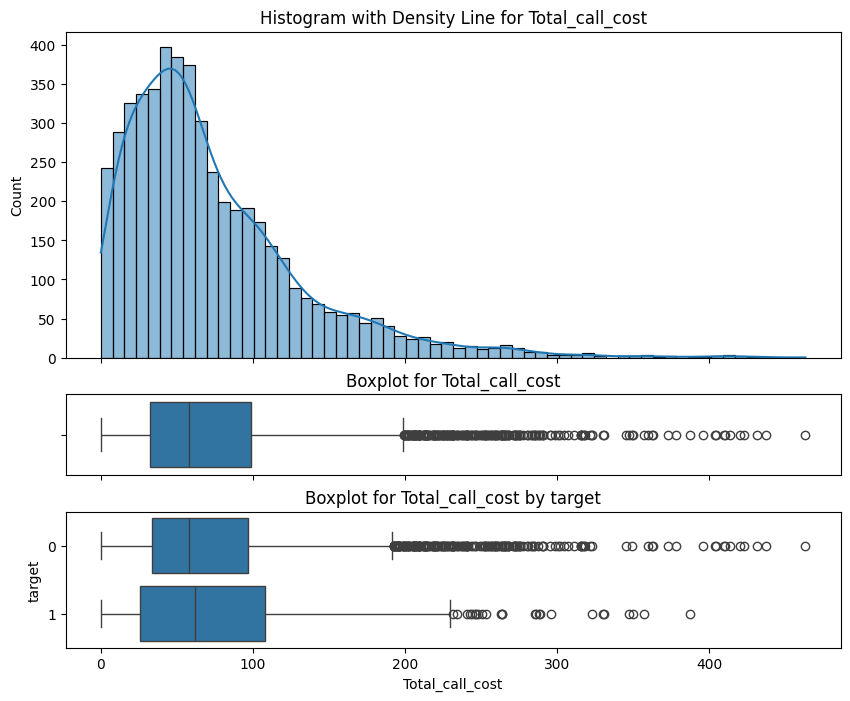

In [157]:
plot_histogram_and_boxplot(data, 'Total_call_cost')

Total_Cost

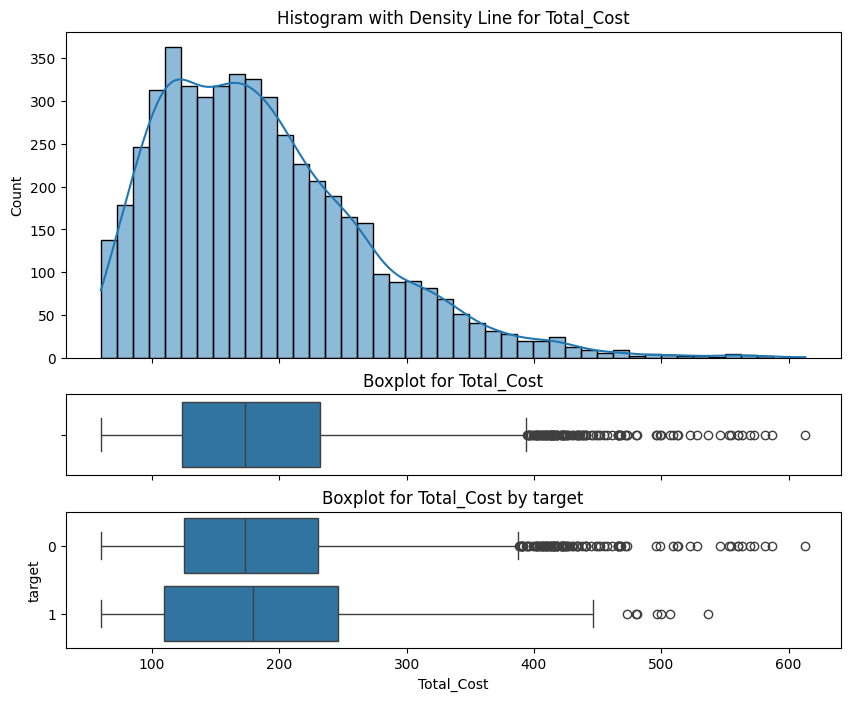

In [158]:
plot_histogram_and_boxplot(data, 'Total_Cost')

average cost min

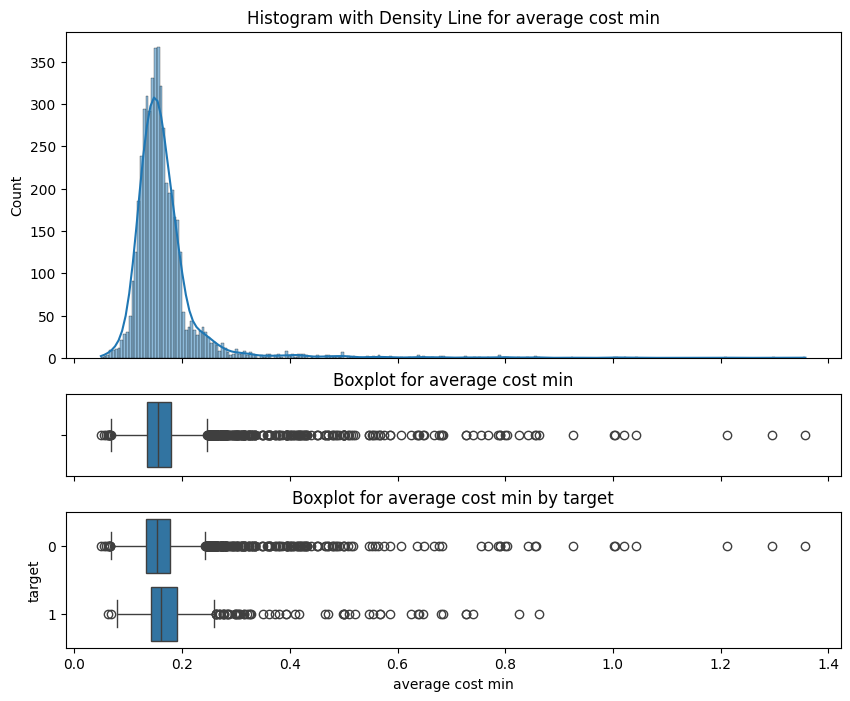

In [159]:
plot_histogram_and_boxplot(data, 'average cost min')

Peak ratio

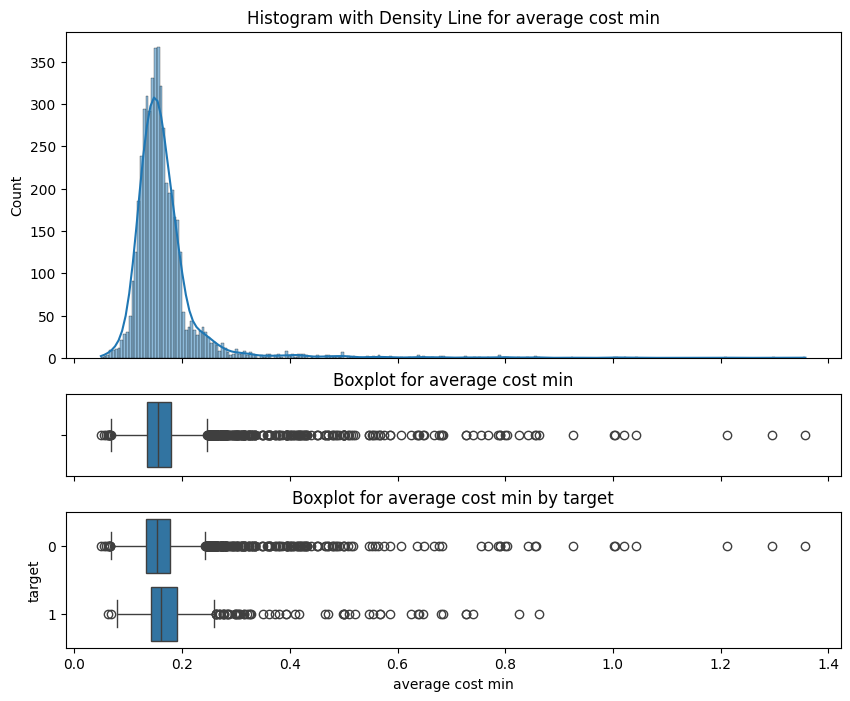

In [160]:
plot_histogram_and_boxplot(data, 'average cost min')

OffPeak ratio

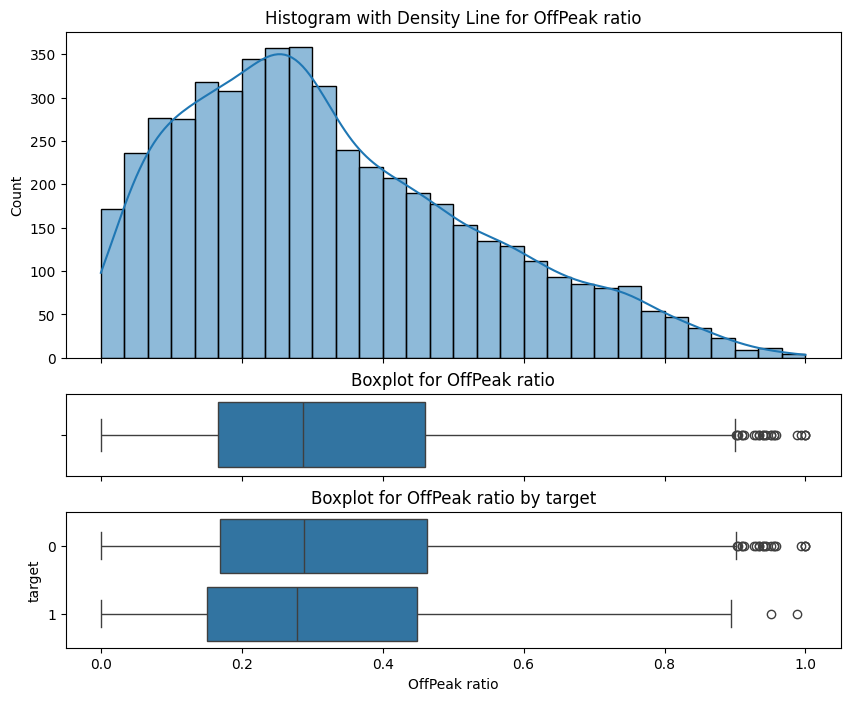

In [161]:
plot_histogram_and_boxplot(data, 'OffPeak ratio')

Weekend ratio

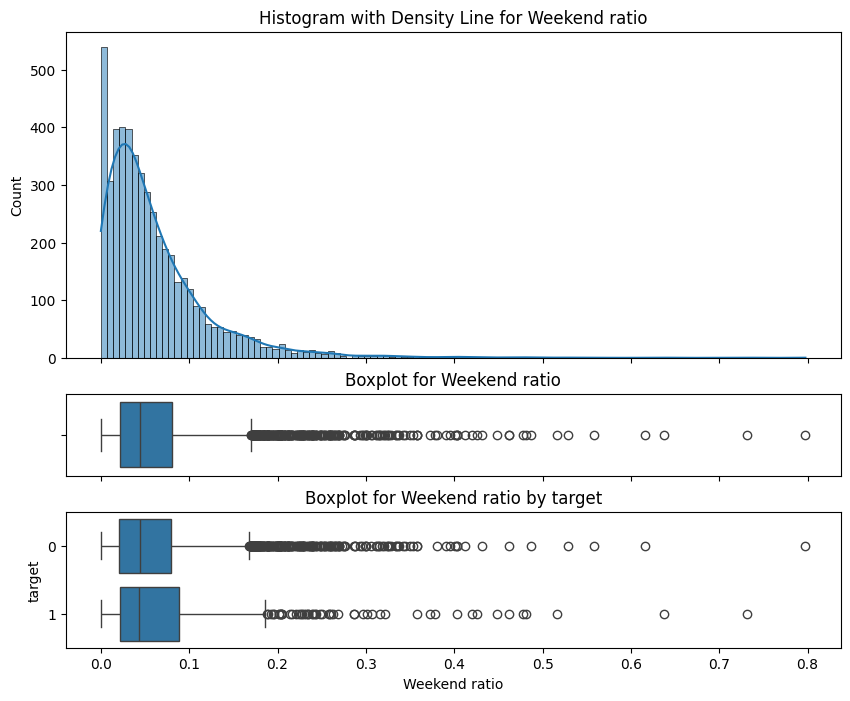

In [162]:
plot_histogram_and_boxplot(data, 'Weekend ratio')

Nat-InterNat Ratio

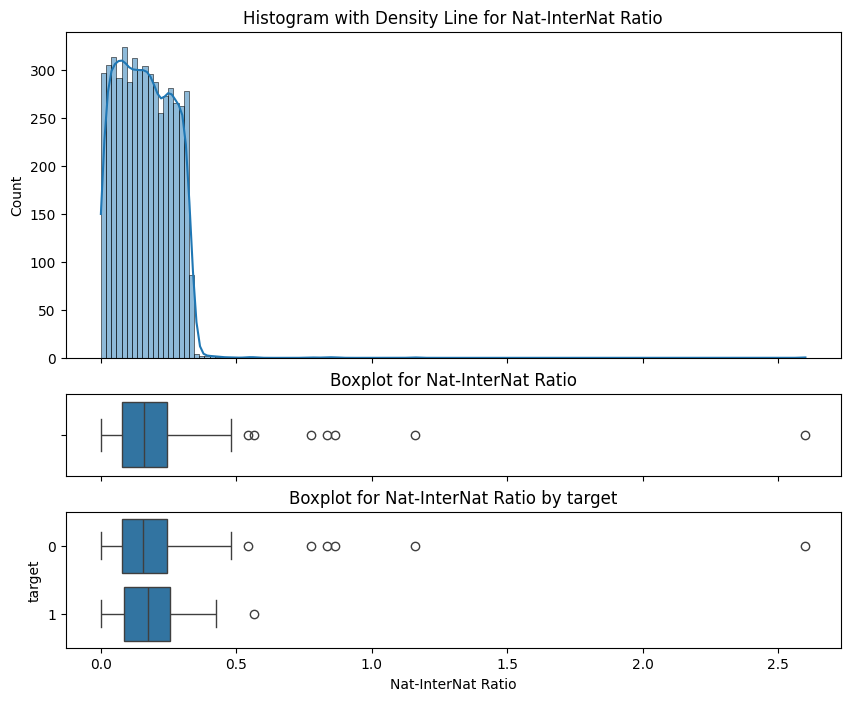

In [163]:
plot_histogram_and_boxplot(data, 'Nat-InterNat Ratio')

maybe truncate the last one?